In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import jax

import jax.numpy as jnp
from jax import random

import sys
sys.path.append('jam')
from dynamics import dynamics
from dynamics import utils as dutils
import datasets

2023-01-06 15:47:44.911224: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /pkgs/cudnn-11.4-v8.2.4.15/lib64:/pkgs/cuda-11.3/lib64:/pkgs/nccl_2.9.9-1+cuda11.3_x86_64:/pkgs/nccl_2.8.3-1+cuda11.0_x86_64/lib:/pkgs/cudnn-11.4-v8.2.4.15/lib64
2023-01-06 15:47:44.911347: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /pkgs/cudnn-11.4-v8.2.4.15/lib64:/pkgs/cuda-11.3/lib64:/pkgs/nccl_2.9.9-1+cuda11.3_x86_64:/pkgs/nccl_2.8.3-1+cuda11.0_x86_64/lib:/pkgs/cudnn-11.4-v8.2.4.15/lib64
2023-01-06 15:47:44.911357: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you wo

In [3]:
key = random.PRNGKey(0)
from configs.am.cifar import generation as config
config = config.get_config()
train_ds, test_ds, _ = datasets.get_dataset(config, additional_dim=None)
train_iter = iter(train_ds)
scaler = datasets.get_image_scaler(config)
inverse_scaler = datasets.get_image_inverse_scaler(config)

data = jnp.array(train_iter.next()['image'])[0]
data = scaler(data)

In [4]:
def plot_dynamics(key, data, name):
  gen_dynamics = dutils.get_dynamics(name)
  t = jnp.linspace(0.0, 1.0, 10).reshape(-1,1,1,1)
  batch = jnp.tile(data[:1], (len(t),1,1,1))
  x_0, x_1, x_t = gen_dynamics(key, batch, t)
  for i in range(x_t.shape[0]):
    plt.subplot(1,x_t.shape[0],i+1)
    plt.imshow(jax.lax.clamp(0.0, inverse_scaler(jnp.array(x_t[i])), 1.0))

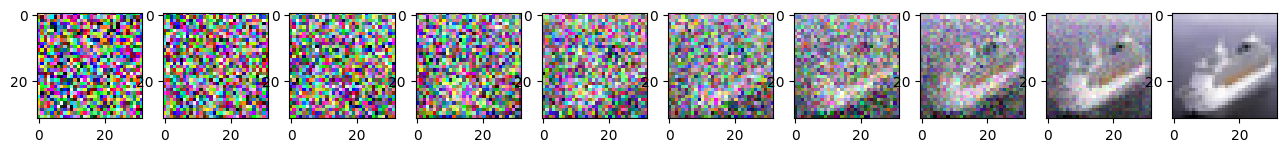

In [5]:
figsize(16,5)
plot_dynamics(random.fold_in(key, int('generation', base=36)), data, 'generation')

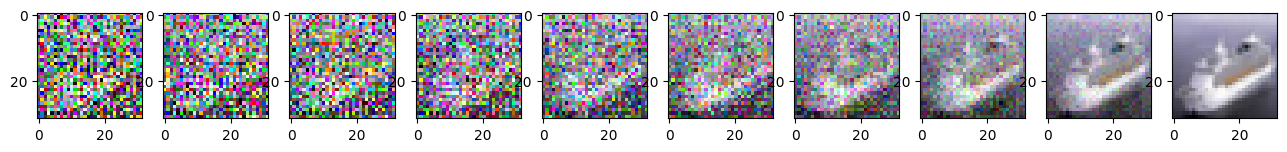

In [6]:
figsize(16,5)
plot_dynamics(random.fold_in(key, int('superres', base=36)), data, 'superres')

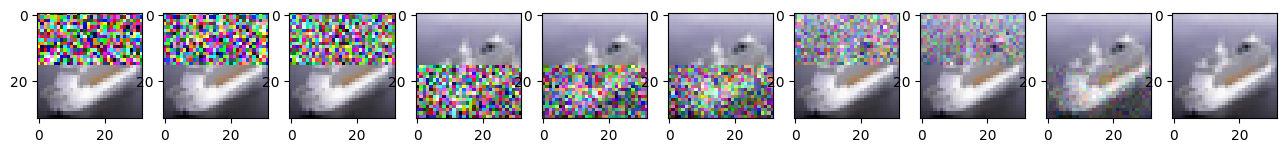

In [7]:
figsize(16,5)
plot_dynamics(random.fold_in(key, int('inpaint', base=36)), data, 'inpaint')

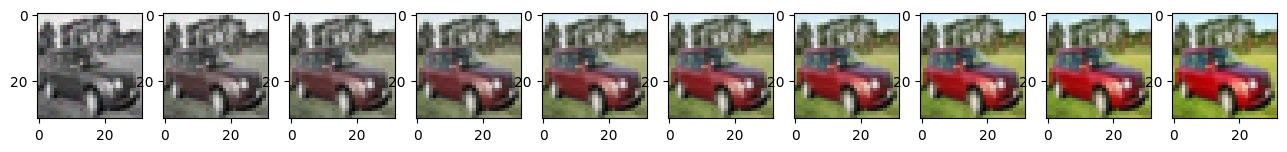

In [5]:
figsize(16,5)
plot_dynamics(random.fold_in(key, int('color', base=36)), data, 'color')